# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

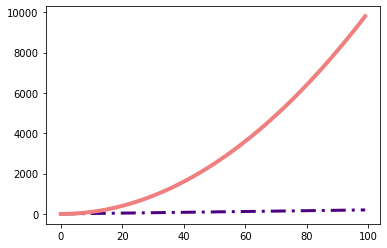

In [7]:
plt.plot(x, y, color='#4b0082', linewidth=3, linestyle=(0, (5, 2, 1, 2)))
plt.plot(x, z, color='lightcoral', linewidth=4)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

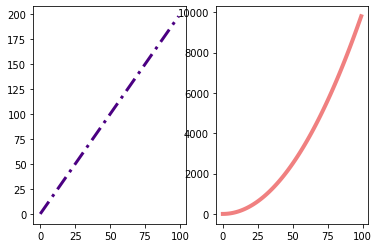

In [12]:
fig_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)
chart_1.plot(x,y, color='#4b0082', linewidth=3, linestyle=(0, (5, 2, 1, 2)))
chart_2.plot(x,z, color='lightcoral', linewidth=4)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

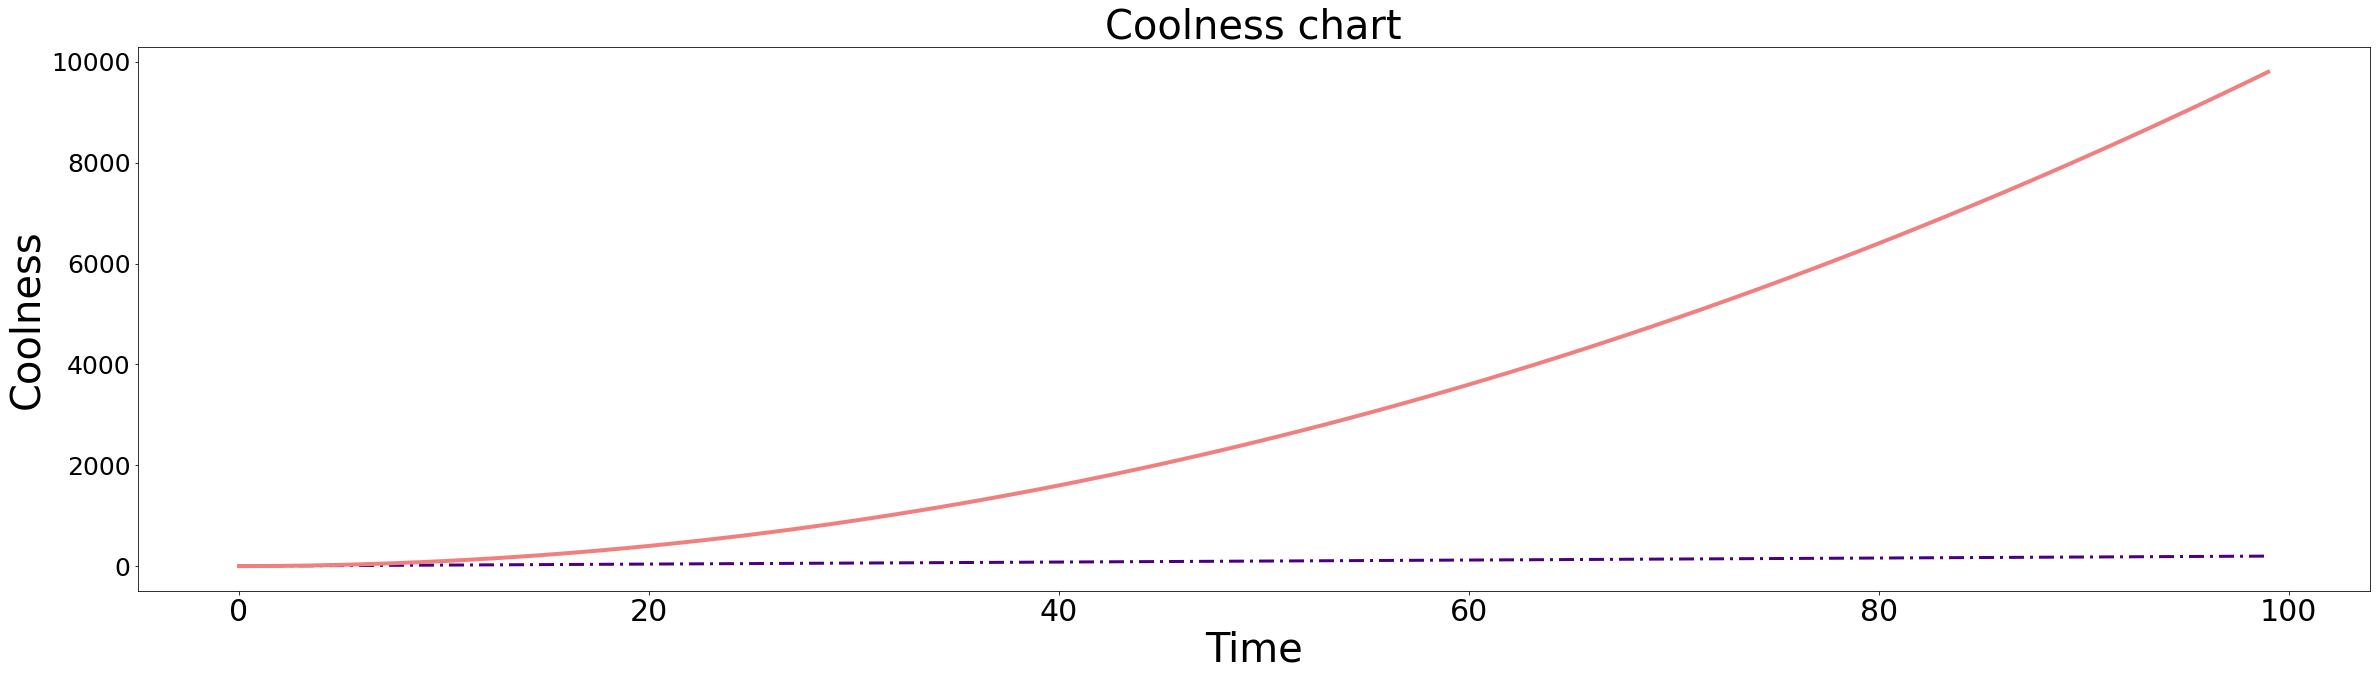

In [24]:
plt.figure(figsize= (40,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.plot(x, y, color='#4b0082', linewidth=3, linestyle=(0, (5, 2, 1, 2)))
plt.plot(x, z, color='lightcoral', linewidth=4)
plt.title("Coolness chart", fontsize=40)
plt.xlabel("Time",fontsize=40)
plt.ylabel("Coolness", fontsize=40)
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [ ]:
# Skip

#### As a bonus challenge, try to add a legend to the plot.

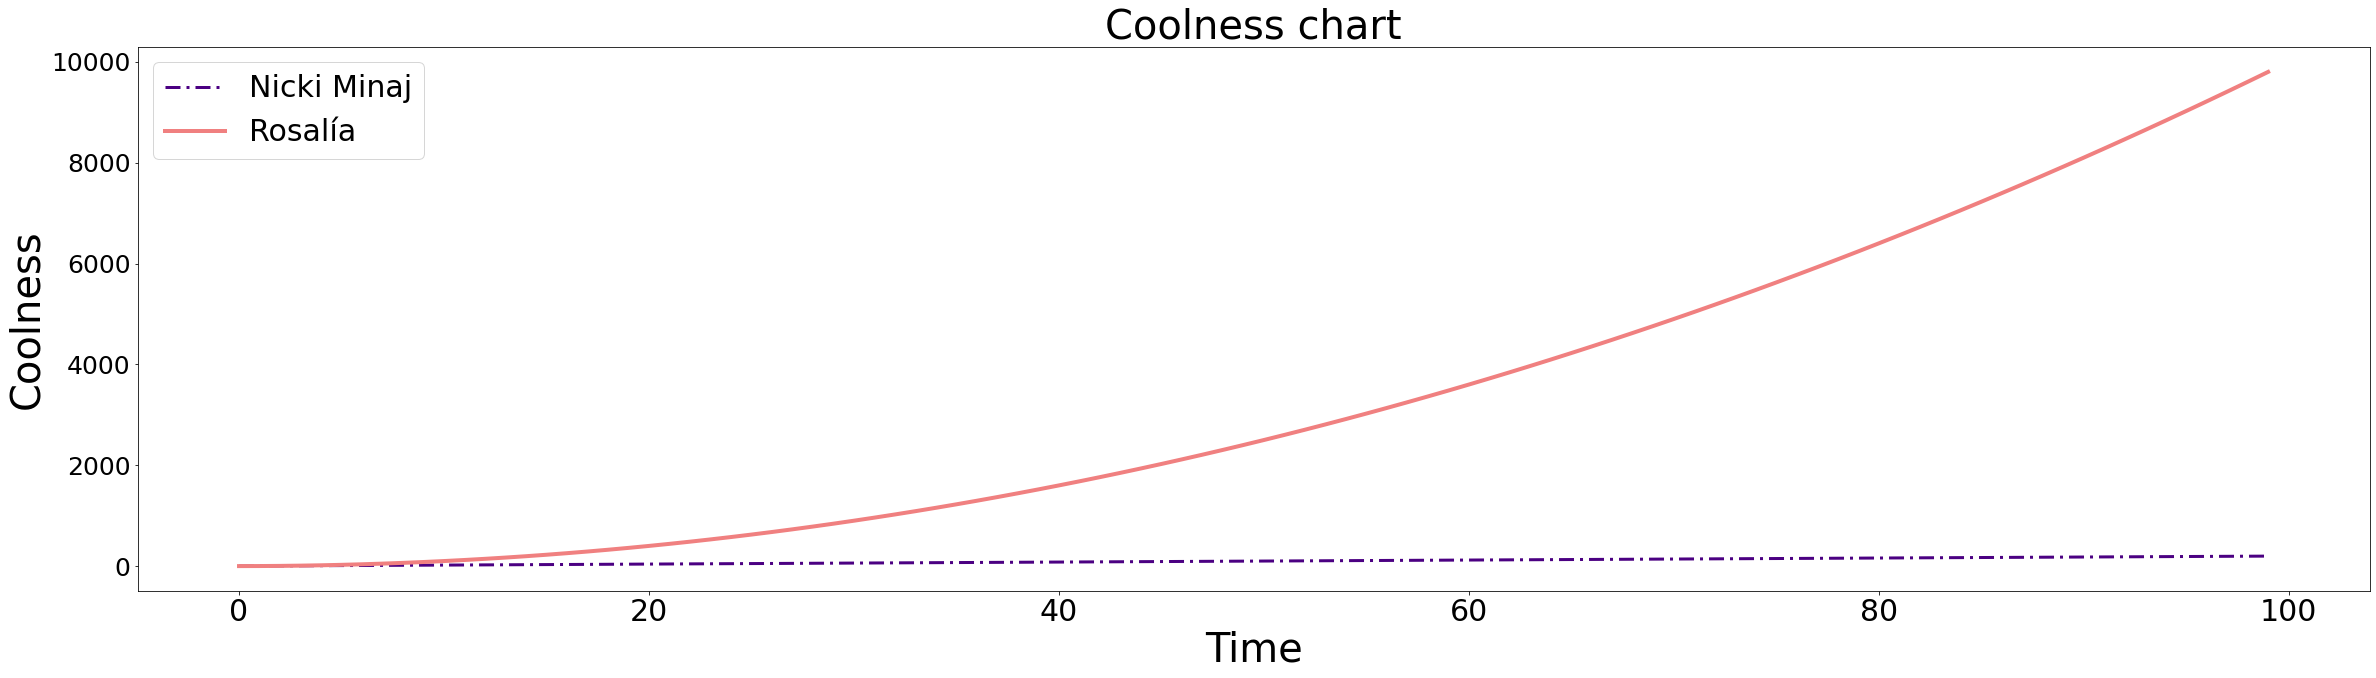

In [28]:
plt.figure(figsize= (40,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.plot(x, y, color='#4b0082', linewidth=3, linestyle=(0, (5, 2, 1, 2)), label="Nicki Minaj")
plt.plot(x, z, color='lightcoral', linewidth=4, label="Rosalía")
plt.title("Coolness chart", fontsize=40)
plt.xlabel("Time",fontsize=40)
plt.ylabel("Coolness", fontsize=40)
plt.legend(loc="upper left", fontsize=30)
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


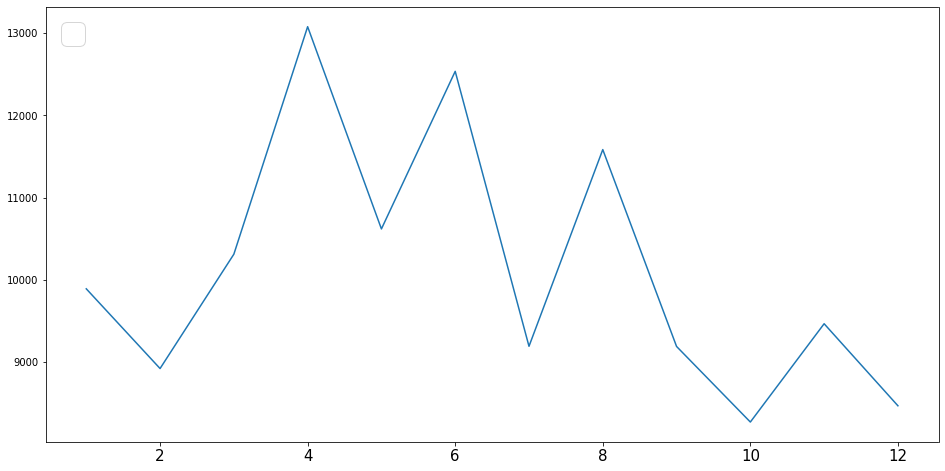

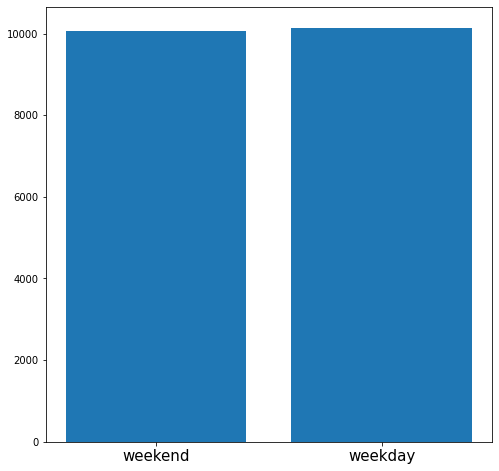

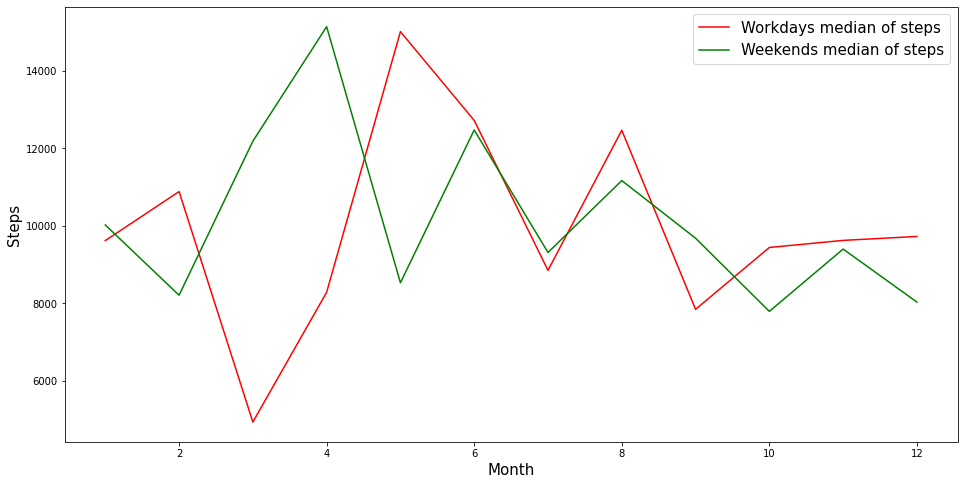

In [18]:
avg_steps_month = fitbit.groupby('Months_encoded').agg({'Steps': 'mean'}).reset_index()

# MEDIAN STEPS BY MONTHS_ENCODED

plt.figure(figsize= (16,8))
plt.plot(avg_steps_month['Months_encoded'], avg_steps_month['Steps'])
plt.xticks(fontsize=15)
plt.legend(loc="upper left", fontsize=30)
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND

avg_steps_week = fitbit.groupby('Work_or_Weekend').agg({'Steps': 'mean'}).reset_index()
avg_steps_week

plt.figure(figsize= (8,8))
plt.bar(avg_steps_week['Work_or_Weekend'], avg_steps_week['Steps'])
plt.xticks(ticks = avg_steps_week['Work_or_Weekend'], labels= ['weekend','weekday'], fontsize=15)
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND ON A MONTHLY BASIS

plt.figure(figsize= (16,8))
avg_steps_week = fitbit.groupby(['Work_or_Weekend','Months_encoded']).agg({'Steps': 'mean'}).reset_index()
condition1 = avg_steps_week['Work_or_Weekend'] == 0
condition2 = avg_steps_week['Work_or_Weekend'] == 1 
avg_steps_work = avg_steps_week[condition1]
avg_steps_weekend = avg_steps_week[condition2]
plt.plot(avg_steps_work['Months_encoded'], avg_steps_work['Steps'], c='r', label='Workdays median of steps' )
plt.plot(avg_steps_weekend['Months_encoded'], avg_steps_weekend['Steps'], c='g', label='Weekends median of steps')
plt.xlabel("Month",fontsize=15)
plt.ylabel("Steps", fontsize=15)
plt.legend(loc="upper right", fontsize=15)
plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

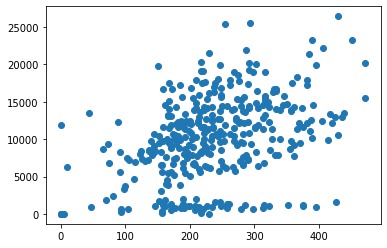

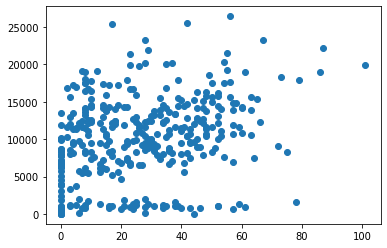

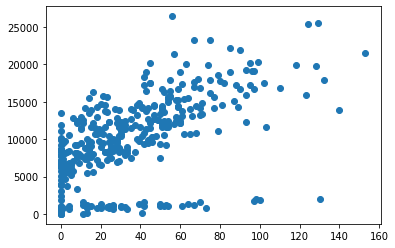

In [79]:
mlist = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']

for element in mlist:
    plt.scatter(fitbit[element], fitbit['Steps'])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [19]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [20]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
display(titanic.select_dtypes('float64'))
display(titanic.select_dtypes('int64'))

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [22]:
display(titanic.select_dtypes('object'))

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [23]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

#### Use the right visulalization to show the distribution of column `Age`.

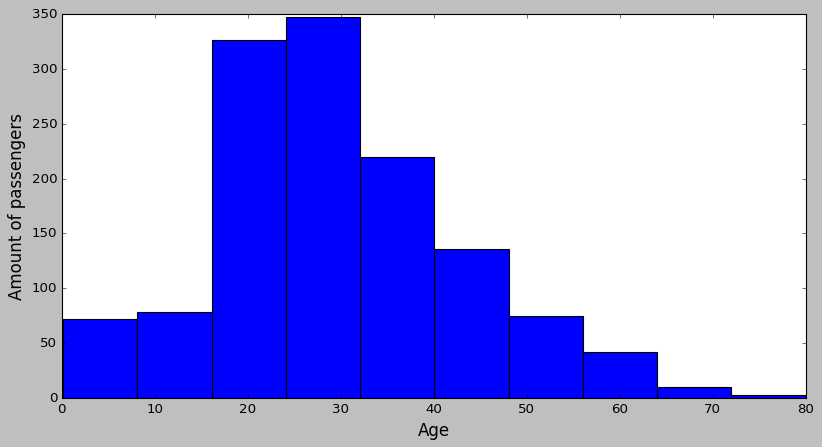

In [26]:
plt.hist(titanic['Age'])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Amount of passengers", fontsize=15)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [27]:
# We can check the number of bins doing the following

bins = pd.cut(titanic['Age'], [0,10,20,50])
bins.value_counts()

(20, 50]    940
(10, 20]    181
(0, 10]      89
Name: Age, dtype: int64

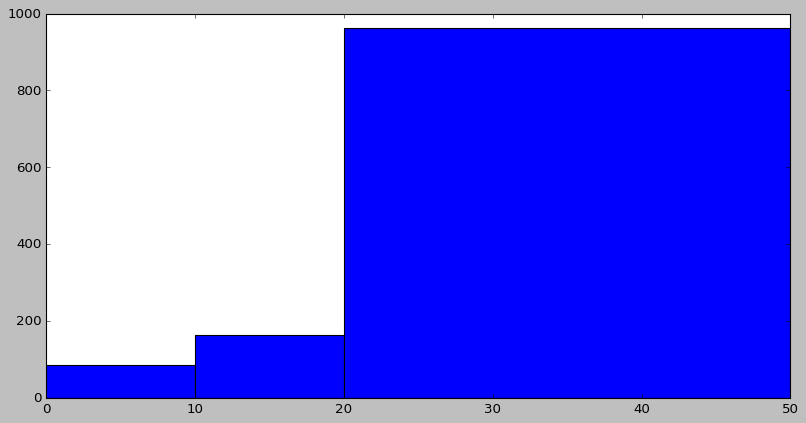

In [28]:
plt.hist(titanic['Age'], bins = [0,10,20,50])
plt.show()

#### How does the bin size affect your plot?

In [31]:
"""
The bigger the bin is (longest distance between values), the more crowded of values that bin is gonna be. 
That's why on the last bin (20 to 50 yrs) has much more values than the other bins. It is also harder to get
accurate insights.
"""

"\nThe bigger the bin is (longest distance between values), the more crowded of values that bin is gonna be. \nThat's why on the last bin (20 to 50 yrs) has much more values than the other bins. It is also harder to get\naccurate insights.\n"

#### Use seaborn to show the distribution of column `Age`.

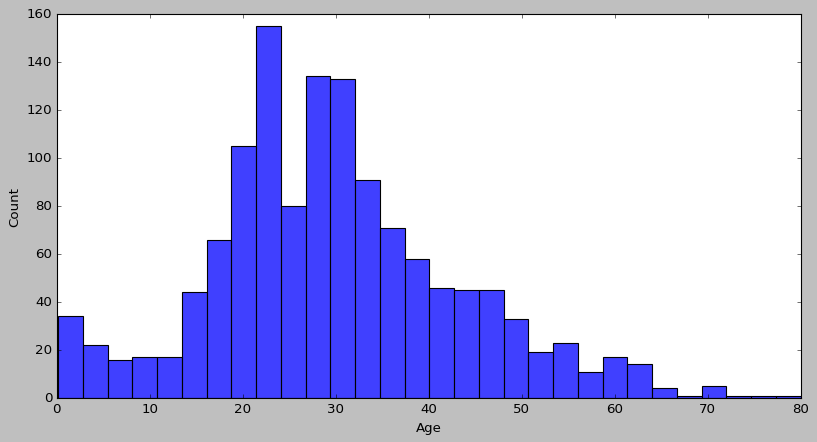

In [30]:
sns.histplot(x='Age', data=titanic)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

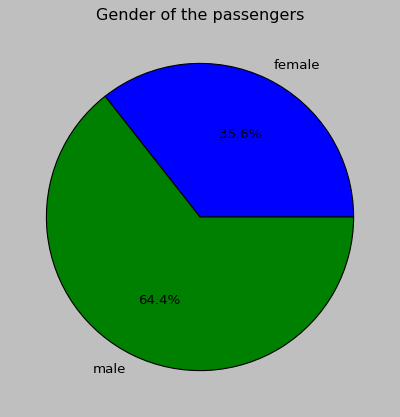

In [33]:
# Method 1 - matplotlib
# We can use a pie chart or a barchart

titanic_gender = titanic.groupby('Gender').agg({'PassengerId':'count'}).reset_index()

plt.pie(titanic_gender['PassengerId'], labels=titanic_gender['Gender'], autopct='%1.1f%%')
plt.title('Gender of the passengers')
plt.show()



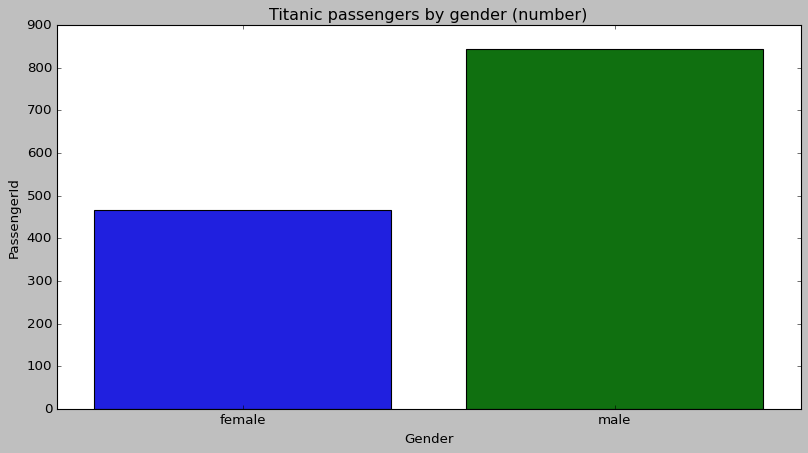

In [35]:
# Method 2 - seaborn
# We can use a barplot with seaborn
sns.barplot(x='Gender', y='PassengerId', data=titanic_gender)
plt.title('Titanic passengers by gender (number)')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

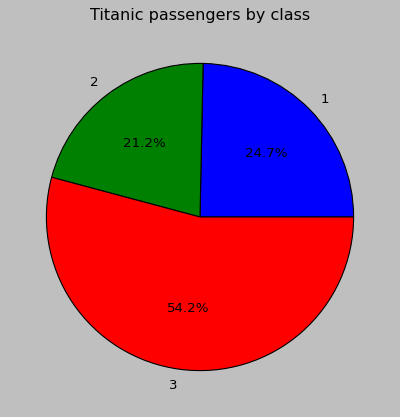

In [36]:
titanic_class = titanic.groupby('Pclass').agg({'PassengerId':'count'}).reset_index()

plt.pie(titanic_class['PassengerId'], labels=titanic_class['Pclass'], autopct='%1.1f%%')
plt.title('Titanic passengers by class')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

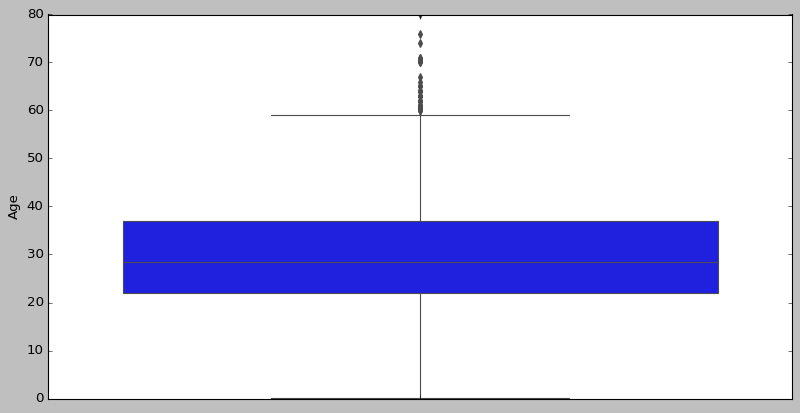

In [37]:
# We can use a boxplot

sns.boxplot(y='Age', data=titanic)
plt.show()

In [ ]:
"""
I would use the boxplot because it gives very complete insights about the values of a single column
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
We can see that the median age is around 30 years, a bit less. And 50% of the values are concentrated in the blue boxes, 
which goes more or less from 22 to 36 years. Because of the high age values (above 3rd quartile), we can tell that the distribution of
values for the age is gonna be positively skewed and that will affect to the mean and other values. We can also say that almost 100% of
age values are below 60 years.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Age:summary statistics')

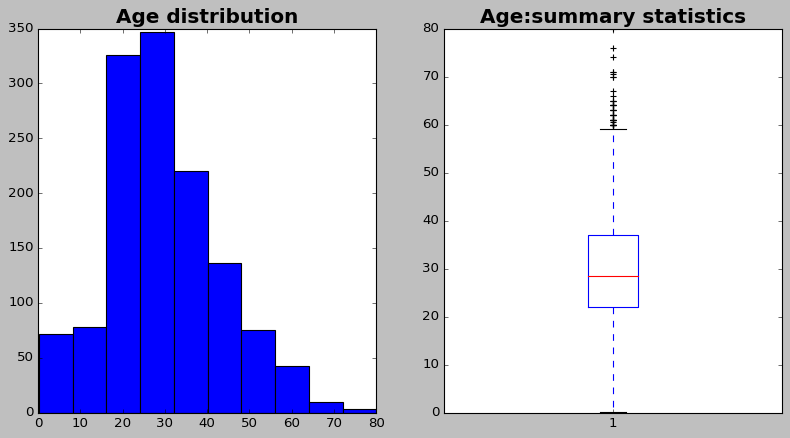

In [42]:
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.hist(titanic['Age'])
ax1.set_title('Age distribution',fontweight="bold", size=18) 
ax2.boxplot(titanic['Age'], data=titanic)
ax2.set_title('Age:summary statistics',fontweight="bold", size=18)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Everything I said right above, don't really have anything else to add... It's nice to have both plots together and to confirm
what we were suspecting above.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<function matplotlib.pyplot.show(close=None, block=None)>

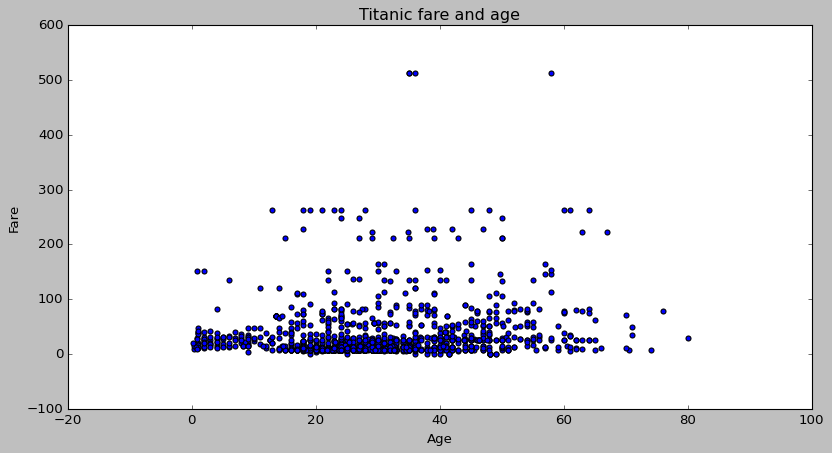

In [43]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Titanic fare and age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

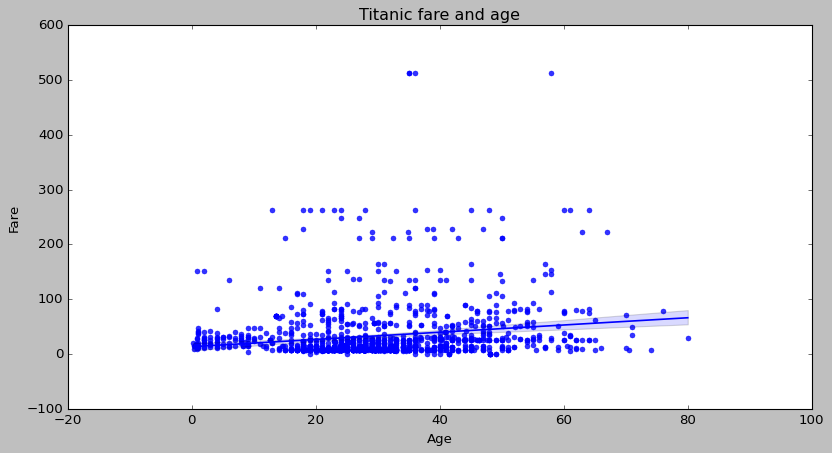

In [44]:
# Method 2 - seaborn
sns.regplot(x="Age", y="Fare", data=titanic)
plt.title('Titanic fare and age')
plt.show

#### Plot the correlation matrix using seaborn.

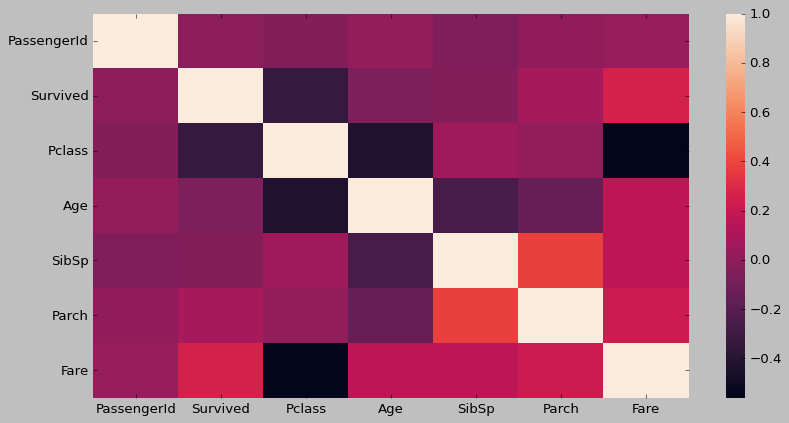

In [45]:
only_numeric = titanic.select_dtypes(include = np.number)
corr = only_numeric.corr()
sns.heatmap(corr)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Seems like most correlated features are the fare with the survived paasengers and 'Parch with SibSp.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

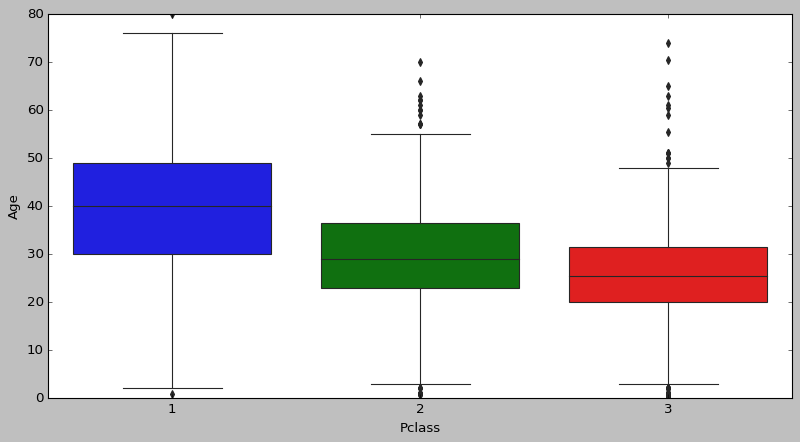

In [53]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

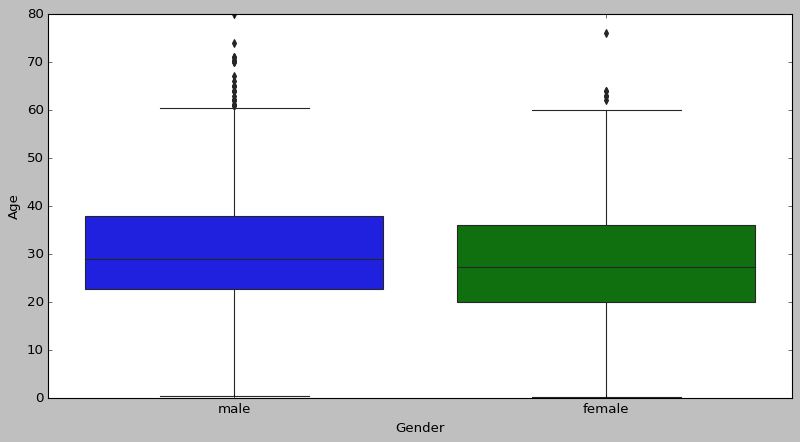

In [46]:
sns.boxplot(x='Gender', y='Age', data=titanic)